In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
filtered_tracks = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/filtered_tracks.pkl')
tracks_df = pd.read_pickle('/Users/apple/Desktop/Akamatsu_Lab/Lap_track/Final/data/track_df_updated.pkl')

In [14]:
filtered_tracks.head()

,track_id,track_length,track_start,track_end,c3_peak,c2_peak,c1_peak,c3_peak_frame,c2_peak_frame,c1_peak_frame,mean_displacement,mean_z,mean_z_displacement,dnm2_positive,actin_positive,membrane_region
24,24,8,0,7,268.426824,168.0,238.0,4,7,6,1.080068,1.625000,0.428571,False,False,Basal
36,36,34,0,33,299.000000,202.0,314.0,25,17,9,2.401203,2.500000,0.787879,True,True,Basal
62,62,21,0,20,319.333333,195.0,241.0,14,1,20,1.964246,3.476190,0.650000,False,False,Basal
73,73,8,0,7,345.835302,224.0,420.0,6,6,6,2.043674,6.625000,1.571429,True,True,Basal
91,91,21,0,20,300.333333,326.0,431.0,17,19,19,1.219383,8.619048,0.500000,True,True,Basal


In [9]:
filtered_tracks['membrane_region'].value_counts()

Lateral    527
Apical     159
Basal      156
Name: membrane_region, dtype: int64

# Looking at only Clathrin & Dynamin Positive Tracks 

In [10]:
dnm2_tracks = filtered_tracks[(filtered_tracks['dnm2_positive'] == True) & 
                              (filtered_tracks['actin_positive'] == False)]

In [12]:
dnm2_tracks.shape

(121, 16)

In [13]:
dnm2_tracks['membrane_region'].value_counts()

Lateral    74
Basal      24
Apical     23
Name: membrane_region, dtype: int64

### Mean Length Comparison Across Membrane Regions

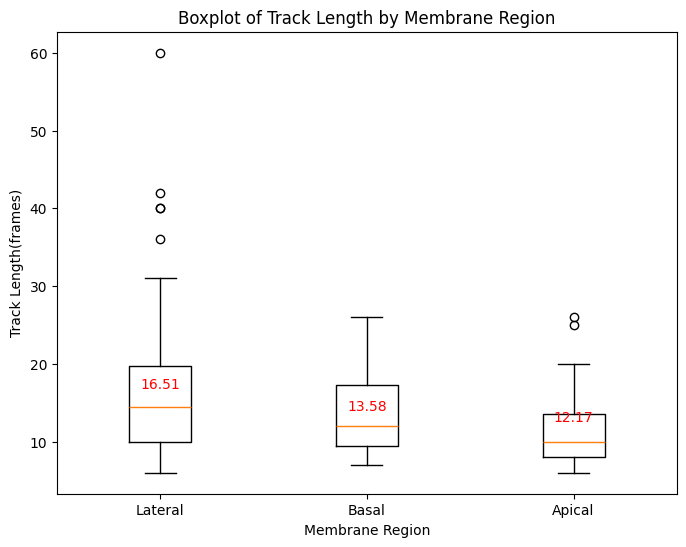

In [33]:
# Group the data by membrane region
grouped_data = [dnm2_tracks[dnm2_tracks['membrane_region'] == region]['track_length'] for region in dnm2_tracks['membrane_region'].unique()]

# Create boxplot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=dnm2_tracks['membrane_region'].unique())

# Add mean values as text annotations
for i, (region, data) in enumerate(zip(dnm2_tracks['membrane_region'].unique(), grouped_data)):
    mean_value = data.mean()
    plt.text(i + 1, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')
    
plt.xlabel('Membrane Region')
plt.ylabel('Track Length(frames)')
plt.title('Boxplot of Track Length by Membrane Region')
plt.show()

### Number of tracks per region

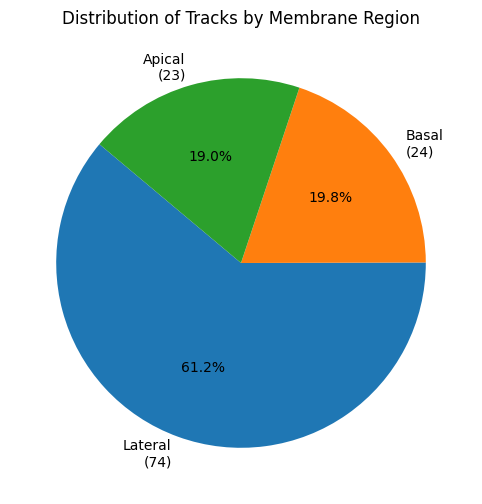

In [32]:
# Count the number of tracks in each region
tracks_per_region = dnm2_tracks['membrane_region'].value_counts()

# Create labels with the actual count only
labels = [f'{region}\n({count})' for region, count in zip(tracks_per_region.index, tracks_per_region.values)]
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tracks_per_region, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tracks by Membrane Region')
plt.show()

### Peaks Comparison Across membrane regions 

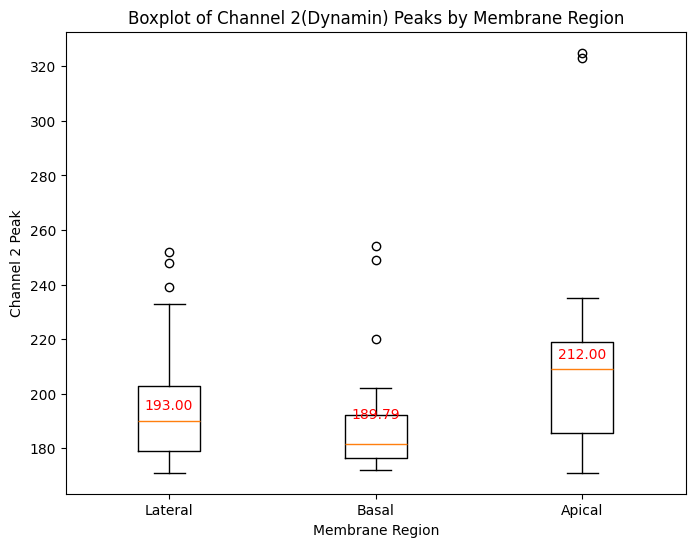

In [36]:
# Group the data by membrane region
grouped_data = [dnm2_tracks[dnm2_tracks['membrane_region'] == region]['c2_peak'] for region in dnm2_tracks['membrane_region'].unique()]

# Create boxplot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=dnm2_tracks['membrane_region'].unique())

# Add mean values as text annotations
for i, (region, data) in enumerate(zip(dnm2_tracks['membrane_region'].unique(), grouped_data)):
    mean_value = data.mean()
    plt.text(i + 1, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')
    
plt.xlabel('Membrane Region')
plt.ylabel('Channel 2 Peak')
plt.title('Boxplot of Channel 2(Dynamin) Peaks by Membrane Region')
plt.show()

# Looking at Actin and Clathrin Positive tracks only 


In [37]:
actin_tracks = filtered_tracks[(filtered_tracks['dnm2_positive'] == False) & 
                              (filtered_tracks['actin_positive'] == True)]

In [39]:
actin_tracks['membrane_region'].value_counts()

Lateral    112
Apical      41
Basal       22
Name: membrane_region, dtype: int64

### Mean Length Comparison Across Membrane Regions 

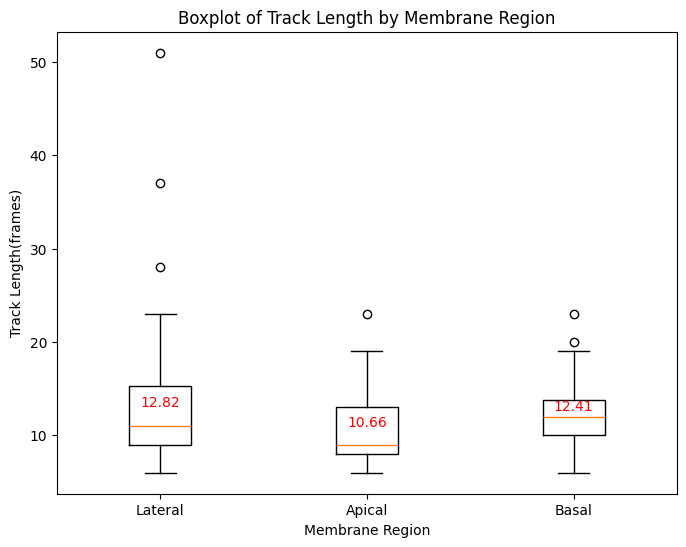

In [40]:
# Group the data by membrane region
grouped_data = [actin_tracks[actin_tracks['membrane_region'] == region]['track_length'] for region in actin_tracks['membrane_region'].unique()]

# Create boxplot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=actin_tracks['membrane_region'].unique())

# Add mean values as text annotations
for i, (region, data) in enumerate(zip(actin_tracks['membrane_region'].unique(), grouped_data)):
    mean_value = data.mean()
    plt.text(i + 1, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')
    
plt.xlabel('Membrane Region')
plt.ylabel('Track Length(frames)')
plt.title('Boxplot of Track Length by Membrane Region')
plt.show()

### Number of tracks per region

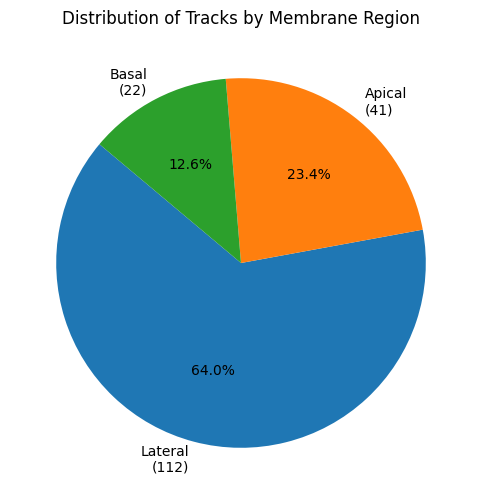

In [41]:
# Count the number of tracks in each region
tracks_per_region = actin_tracks['membrane_region'].value_counts()

# Create labels with the actual count only
labels = [f'{region}\n({count})' for region, count in zip(tracks_per_region.index, tracks_per_region.values)]
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tracks_per_region, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tracks by Membrane Region')
plt.show()

### Peaks Comparison Across membrane regions 

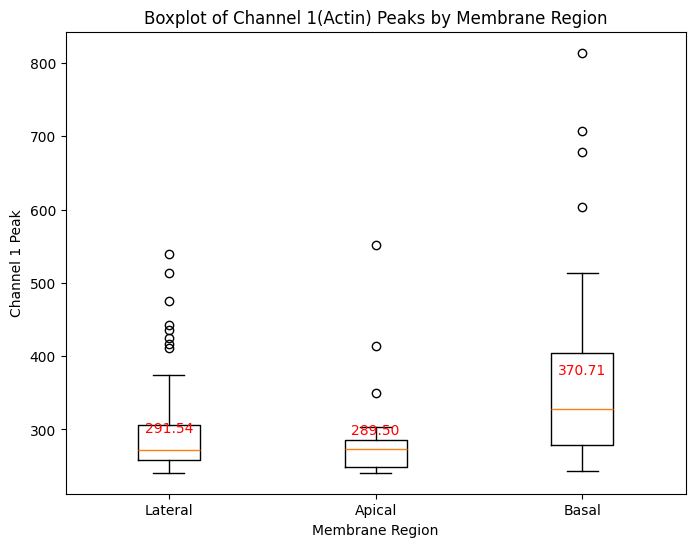

In [43]:
# Group the data by membrane region
grouped_data = [actin_tracks[actin_tracks['membrane_region'] == region]['c1_peak'] for region in dnm2_tracks['membrane_region'].unique()]

# Create boxplot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=actin_tracks['membrane_region'].unique())

# Add mean values as text annotations
for i, (region, data) in enumerate(zip(actin_tracks['membrane_region'].unique(), grouped_data)):
    mean_value = data.mean()
    plt.text(i + 1, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')
    
plt.xlabel('Membrane Region')
plt.ylabel('Channel 1 Peak')
plt.title('Boxplot of Channel 1(Actin) Peaks by Membrane Region')
plt.show()

# Looking at Actin, Dynamin and Clathrin Positive Tracks

In [44]:
positive_tracks = filtered_tracks[(filtered_tracks['dnm2_positive'] == True) & 
                              (filtered_tracks['actin_positive'] == True)]

In [45]:
positive_tracks.shape

(191, 16)

In [46]:
positive_tracks['membrane_region'].value_counts()

Lateral    133
Apical      38
Basal       20
Name: membrane_region, dtype: int64

### Mean Length Comparison Across Membrane Regions 

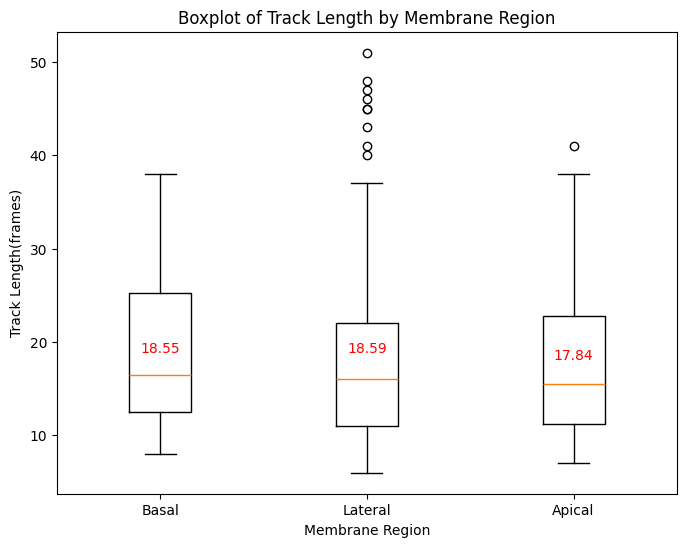

In [48]:
# Group the data by membrane region
grouped_data = [positive_tracks[positive_tracks['membrane_region'] == region]['track_length'] for region in positive_tracks['membrane_region'].unique()]

# Create boxplot using Matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_data, labels=positive_tracks['membrane_region'].unique())

# Add mean values as text annotations
for i, (region, data) in enumerate(zip(positive_tracks['membrane_region'].unique(), grouped_data)):
    mean_value = data.mean()
    plt.text(i + 1, mean_value, f'{mean_value:.2f}', ha='center', va='bottom', color='red')
    
plt.xlabel('Membrane Region')
plt.ylabel('Track Length(frames)')
plt.title('Boxplot of Track Length by Membrane Region')
plt.show()

### Number of Tracks per Region 

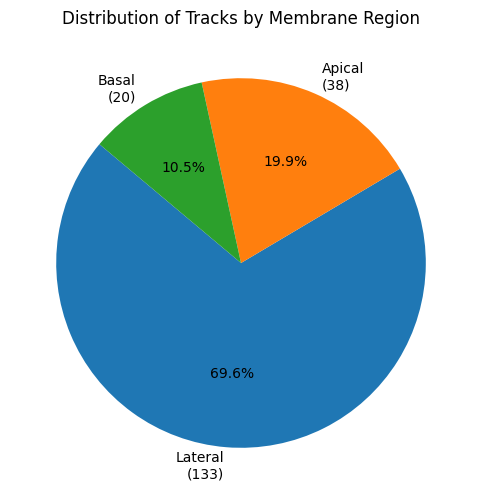

In [49]:
# Count the number of tracks in each region
tracks_per_region = positive_tracks['membrane_region'].value_counts()

# Create labels with the actual count only
labels = [f'{region}\n({count})' for region, count in zip(tracks_per_region.index, tracks_per_region.values)]
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tracks_per_region, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Tracks by Membrane Region')
plt.show()